# West Nile Virus: Pre-processing (2007 and 2013 data)
---

In this notebook, we will focus on analysis of the combined train dataset that was constructed in the Feature Engineering phase.

## Content
---

- [Locations](../code/99_Locations.ipynb)
- [Data Cleaning Summary](../code/01_Data_Cleaning.ipynb) 
- [Train-test Investigation](../code/01a_Train_Test_Investigation.ipynb) 
- [Weather Investigation](../code/01b_Weather_Investigation.ipynb) 
- [Spray Investigation](../code/01c_Spray_Investigation.ipynb) 
- [Feature Engineering](../code/02a_Feature_Engineering.ipynb) 
- [Combined EDA and Preprocessing](../code/02b_Combined_EDA_and_Preprocessing.ipynb) **Current Notebook**
- [Model Tuning & Conclusion](../code/03_Model_Tuning_&_Conclusion.ipynb)

## Import library
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import pickle

## Import combined train and test datasets

In [ ]:
train_weather_spray = pd.read_csv('../assets/train_weather_spray_combined_daylight.csv')
train_weather_spray.loc[:,'Date'] = pd.to_datetime(train_weather_spray.loc[:,'Date'], format='%Y-%m-%d', errors='raise')
train_weather_spray.loc[:,'Sunrise_datetime'] = pd.to_datetime(train_weather_spray.loc[:,'Sunrise_datetime'], errors='raise')
train_weather_spray.loc[:,'Sunset_datetime'] = pd.to_datetime(train_weather_spray.loc[:,'Sunset_datetime'], errors='raise')
train_weather_spray.loc[:,'week_of_year'] = train_weather_spray.loc[:, 'Date'].apply(lambda x: x.strftime("%W"))
print(train_weather_spray.shape)
train_weather_spray.head(3)

(7370, 86)


,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,NumMosquitos_sum,species_culex_erraticus,...,CodeSum_TSRA_sum_past21day,CodeSum_DZ_sum_past21day,data_availability_for_21_days,sp_count_past_7_days_25_meters,sp_count_past_7_days_50_meters,sp_count_past_7_days_75_meters,sp_count_past_14_days_25_meters,sp_count_past_14_days_50_meters,sp_count_past_14_days_75_meters,daylight_duration_in_minutes
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1.0,0,...,1,0,21,0,0,0,0,0,0,896.0
1,2007-05-29,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1.0,0,...,1,0,21,0,0,0,0,0,0,896.0
2,2007-05-29,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,0,1.0,0,...,1,0,21,0,0,0,0,0,0,896.0


In [ ]:
test = pd.read_csv('../assets/test_weather_combined_daylight.csv')
test.loc[:,'Date'] = pd.to_datetime(test.loc[:,'Date'], format='%Y-%m-%d', errors='raise')
test.loc[:,'Sunrise_datetime'] = pd.to_datetime(test.loc[:,'Sunrise_datetime'], errors='raise')
test.loc[:,'Sunset_datetime'] = pd.to_datetime(test.loc[:,'Sunset_datetime'], errors='raise')
print(test.shape)
test.head(3)

(116293, 80)


,Id,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,species_culex_erraticus,...,PrecipTotal_mean_past14day,CodeSum_RA_sum_past14day,CodeSum_TSRA_sum_past14day,CodeSum_DZ_sum_past14day,data_availability_for_14_days,CodeSum_RA_sum_past21day,CodeSum_TSRA_sum_past21day,CodeSum_DZ_sum_past21day,data_availability_for_21_days,daylight_duration_in_minutes
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.95469,-87.800991,9,0,...,0.218857,9,5,1,14,10,7,1,21,910.0
1,2,2008-06-11,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.95469,-87.800991,9,0,...,0.218857,9,5,1,14,10,7,1,21,910.0
2,3,2008-06-11,CULEX PIPIENS,41,N OAK PARK AVE,T002,41.95469,-87.800991,9,0,...,0.218857,9,5,1,14,10,7,1,21,910.0


In [ ]:
spray_cleaned = pd.read_csv('../assets/spray_cleaned.csv')
spray_cleaned.loc[:,'Date'] = pd.to_datetime(spray_cleaned.loc[:,'Date'], format='%Y-%m-%d', errors='raise')
spray_cleaned.loc[:,'year_and_month'] = spray_cleaned.loc[:,'Date'].apply(lambda x: x.strftime('%Y-%m'))
spray_cleaned.loc[:,'week_of_year'] = spray_cleaned.loc[:, 'Date'].apply(lambda x: x.strftime("%W"))
spray_cleaned.head(2)

,Date,Time,Latitude,Longitude,7Daysfterspray,14Daysfterspray,21Daysfterspray,year_and_month,week_of_year
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-09-05,2011-09-12,2011-09-19,2011-08,35
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-09-05,2011-09-12,2011-09-19,2011-08,35


In [ ]:
train_weather_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370 entries, 0 to 7369
Data columns (total 86 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             7370 non-null   datetime64[ns]
 1   Species                          7370 non-null   object        
 2   Block                            7370 non-null   int64         
 3   Street                           7370 non-null   object        
 4   Trap                             7370 non-null   object        
 5   Latitude                         7370 non-null   float64       
 6   Longitude                        7370 non-null   float64       
 7   WnvPresent                       7370 non-null   int64         
 8   NumMosquitos_sum                 7370 non-null   float64       
 9   species_culex_erraticus          7370 non-null   int64         
 10  species_culex_pipiens            7370 non-null   int64      

In [ ]:
calendar_dict = {i: calendar.month_abbr[i] for i in range(1,13)}
calendar_month_order = [calendar.month_abbr[i] for i in range(1,13)]

In [ ]:
train_weather_spray.loc[:,'month_name'] = train_weather_spray.loc[:,'month_of_year'].apply(lambda x: calendar.month_abbr[x])

### Updated train and test files

In [ ]:
columns_to_drop = ['Date','Species', 'Block', 'Street','Trap','reference_weather_stn','Station','Tmax','Tmin',
                    'Sunrise_datetime','Sunset_datetime','year_and_month','NumMosquitos_sum', 'month_name']
historical_spray_columns = [c for c in train_weather_spray.columns if 'sp_count' in c]
data_availability_coumns = [c for c in train_weather_spray.columns if 'data_availability' in c]
codesum_cols = train_weather_spray.columns[train_weather_spray.columns.str.contains('CodeSum')]

<AxesSubplot:title={'center':'Count plot for all CodeSum Features'}>

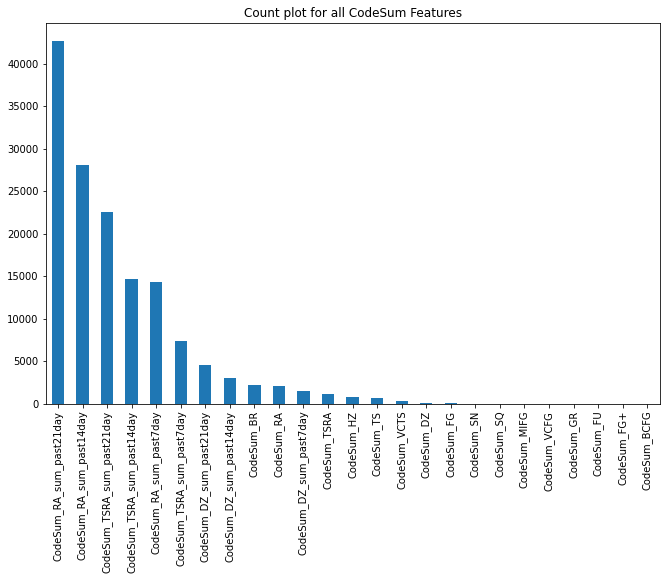

In [ ]:
codesum_cols = train_weather_spray.columns[train_weather_spray.columns.str.contains('CodeSum')]

plt.figure(figsize=(11,7))
plt.title('Count plot for all CodeSum Features')
codesum_counts = train_weather_spray[codesum_cols].sum().sort_values(ascending=False)
codesum_counts.plot(kind='bar')

In [ ]:
bad_codesum = list(codesum_counts[codesum_counts == 0].index)
bad_codesum

['CodeSum_SN',
 'CodeSum_SQ',
 'CodeSum_MIFG',
 'CodeSum_VCFG',
 'CodeSum_GR',
 'CodeSum_FU',
 'CodeSum_FG+',
 'CodeSum_BCFG']

In [ ]:
 columns_to_drop = columns_to_drop + bad_codesum + historical_spray_columns + data_availability_coumns
 columns_to_drop

['Date',
 'Species',
 'Block',
 'Street',
 'Trap',
 'reference_weather_stn',
 'Station',
 'Tmax',
 'Tmin',
 'Sunrise_datetime',
 'Sunset_datetime',
 'year_and_month',
 'NumMosquitos_sum',
 'month_name',
 'CodeSum_SN',
 'CodeSum_SQ',
 'CodeSum_MIFG',
 'CodeSum_VCFG',
 'CodeSum_GR',
 'CodeSum_FU',
 'CodeSum_FG+',
 'CodeSum_BCFG',
 'sp_count_past_7_days_25_meters',
 'sp_count_past_7_days_50_meters',
 'sp_count_past_7_days_75_meters',
 'sp_count_past_14_days_25_meters',
 'sp_count_past_14_days_50_meters',
 'sp_count_past_14_days_75_meters',
 'data_availability_for_7_days',
 'data_availability_for_14_days',
 'data_availability_for_21_days']

In [ ]:
train_weather_spray_exp4 = train_weather_spray.drop(columns=columns_to_drop, errors='ignore')
train_weather_spray_exp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370 entries, 0 to 7369
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        7370 non-null   float64
 1   Longitude                       7370 non-null   float64
 2   WnvPresent                      7370 non-null   int64  
 3   species_culex_erraticus         7370 non-null   int64  
 4   species_culex_pipiens           7370 non-null   int64  
 5   species_culex_pipiens_restuans  7370 non-null   int64  
 6   species_culex_restuans          7370 non-null   int64  
 7   species_culex_salinarius        7370 non-null   int64  
 8   species_culex_tarsalis          7370 non-null   int64  
 9   species_culex_territans         7370 non-null   int64  
 10  species_unspecified_culex       7370 non-null   int64  
 11  month_of_year                   7370 non-null   int64  
 12  week_of_year                    73

In [ ]:
train_weather_spray_exp4.to_csv('../assets/train_final_v2_daylight_exp4.csv', index=False)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 80 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Id                              116293 non-null  int64         
 1   Date                            116293 non-null  datetime64[ns]
 2   Species                         116293 non-null  object        
 3   Block                           116293 non-null  int64         
 4   Street                          116293 non-null  object        
 5   Trap                            116293 non-null  object        
 6   Latitude                        116293 non-null  float64       
 7   Longitude                       116293 non-null  float64       
 8   AddressAccuracy                 116293 non-null  int64         
 9   species_culex_erraticus         116293 non-null  int64         
 10  species_culex_pipiens           116293 non-null  int64  

In [ ]:
test_exp4 = test.drop(columns=columns_to_drop, errors='ignore')
test_columns = ['Id']+[c for c in train_weather_spray_exp4 if c != 'WnvPresent']
#columns_test
test_exp4 = test_exp4.loc[:, test_columns]
test_exp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              116293 non-null  int64  
 1   Latitude                        116293 non-null  float64
 2   Longitude                       116293 non-null  float64
 3   species_culex_erraticus         116293 non-null  int64  
 4   species_culex_pipiens           116293 non-null  int64  
 5   species_culex_pipiens_restuans  116293 non-null  int64  
 6   species_culex_restuans          116293 non-null  int64  
 7   species_culex_salinarius        116293 non-null  int64  
 8   species_culex_tarsalis          116293 non-null  int64  
 9   species_culex_territans         116293 non-null  int64  
 10  species_unspecified_culex       116293 non-null  int64  
 11  month_of_year                   116293 non-null  int64  
 12  week_of_year    

In [ ]:
test_exp4.to_csv('../assets/test_final_v2_daylight_exp4.csv', index=False)

In [ ]:
test_exp4.head(2)

,Id,Latitude,Longitude,species_culex_erraticus,species_culex_pipiens,species_culex_pipiens_restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,...,Cool_mean_past14day,AvgSpeed_mean_past14day,PrecipTotal_mean_past14day,CodeSum_RA_sum_past14day,CodeSum_TSRA_sum_past14day,CodeSum_DZ_sum_past14day,CodeSum_RA_sum_past21day,CodeSum_TSRA_sum_past21day,CodeSum_DZ_sum_past21day,daylight_duration_in_minutes
0,1,41.95469,-87.800991,0,0,1,0,0,0,0,...,5.428571,9.95,0.218857,9,5,1,10,7,1,910.0
1,2,41.95469,-87.800991,0,0,0,1,0,0,0,...,5.428571,9.95,0.218857,9,5,1,10,7,1,910.0
